# Performing anomaly detection on UNSW_NB15_1 dataset

## 1.1 Loading the dataset

Connecting to the google drive where dataset is stored

In [ ]:
## Mouting the google drive in which datasets are stored
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Loading the necessary libraries






In [ ]:
## Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

>Loading the dataset

In [ ]:
## Loading the dataset
data = pd.read_csv('drive/MyDrive/netSecurity/UNSW-NB15_1.csv', sep=',',
                   low_memory = False, header= None)

In [ ]:
## Checking the shape of UNSW-NB15_1 dataset
data.shape

(700001, 49)

In [ ]:
## Getting the overview of the loaded data
data.head()

0      1              2     3    4    5         6    7    8   9   \
0  59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31   
1  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
2  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   
3  59.166.0.5   3593  149.171.126.5    53  udp  CON  0.001209  132  164  31   
4  59.166.0.3  49664  149.171.126.0    53  udp  CON  0.001169  146  178  31   

   ...  39  40  41 42  43  44  45  46   47  48  
0  ...   0   3   7  1   3   1   1   1  NaN   0  
1  ...   0   2   4  2   3   1   1   2  NaN   0  
2  ...   0  12   8  1   2   2   1   1  NaN   0  
3  ...   0   6   9  1   1   1   1   1  NaN   0  
4  ...   0   7   9  1   1   1   1   1  NaN   0  

[5 rows x 49 columns]

In [ ]:

## Getting the feature names for above loaded dataset
featuresNames = pd.read_csv('drive/MyDrive/netSecurity/NUSW-NB15_features.csv',
                            encoding='latin-1')
## printing the feature names
featuresNames

No.              Name      Type   \
0     1             srcip    nominal   
1     2             sport    integer   
2     3             dstip    nominal   
3     4            dsport    integer   
4     5             proto    nominal   
5     6             state    nominal   
6     7               dur      Float   
7     8            sbytes    Integer   
8     9            dbytes    Integer   
9    10              sttl    Integer   
10   11              dttl    Integer   
11   12             sloss    Integer   
12   13             dloss    Integer   
13   14           service    nominal   
14   15             Sload      Float   
15   16             Dload      Float   
16   17             Spkts    integer   
17   18             Dpkts    integer   
18   19              swin    integer   
19   20              dwin    integer   
20   21             stcpb    integer   
21   22             dtcpb    integer   
22   23           smeansz    integer   
23   24           dmeansz    integer   
24   25       trans_depth    integer   
25   26       res_bdy_len    integer   
26   27              Sjit      Float   
27   28              Djit      Float   
28   29             Stime  Timestamp   
29   30             Ltime  Timestamp   
30   31           Sintpkt      Float   
31   32           Dintpkt      Float   
32   33            tcprtt      Float   
33   34            synack      Float   
34   35            ackdat      Float   
35   36   is_sm_ips_ports     Binary   
36   37      ct_state_ttl    Integer   
37   38  ct_flw_http_mthd    Integer   
38   39      is_ftp_login     Binary   
39   40        ct_ftp_cmd    integer   
40   41        ct_srv_src    integer   
41   42        ct_srv_dst    integer   
42   43        ct_dst_ltm    integer   
43   44       ct_src_ ltm    integer   
44   45  ct_src_dport_ltm    integer   
45   46  ct_dst_sport_ltm    integer   
46   47    ct_dst_src_ltm    integer   
47   48        attack_cat    nominal   
48   49             Label     binary   

                                          Description  
0                                   Source IP address  
1                                  Source port number  
2                              Destination IP address  
3                             Destination port number  
4                                Transaction protocol  
5   Indicates to the state and its dependent proto...  
6                               Record total duration  
7            Source to destination transaction bytes   
8             Destination to source transaction bytes  
9           Source to destination time to live value   
10           Destination to source time to live value  
11           Source packets retransmitted or dropped   
12       Destination packets retransmitted or dropped  
13  http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...  
14                             Source bits per second  
15                        Destination bits per second  
16                Source to destination packet count   
17                 Destination to source packet count  
18              Source TCP window advertisement value  
19         Destination TCP window advertisement value  
20                    Source TCP base sequence number  
21               Destination TCP base sequence number  
22  Mean of the ?ow packet size transmitted by the...  
23  Mean of the ?ow packet size transmitted by the...  
24  Represents the pipelined depth into the connec...  
25  Actual uncompressed content size of the data t...  
26                               Source jitter (mSec)  
27                          Destination jitter (mSec)  
28                                  record start time  
29                                   record last time  
30             Source interpacket arrival time (mSec)  
31        Destination interpacket arrival time (mSec)  
32  TCP connection setup round-trip time, the sum ...  
33  TCP connection setup time, the time between th...  
34  TCP connection setup time, the time bet

## 1.2 Overlaying feature names on the dataset

In [ ]:
## Assigning features names to the repective columns using the features names
## dataset
feaNames= np.array(featuresNames['Name'])
data.columns = feaNames
data.head()

srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   
3     164    31  ...           0           6           9          1   
4     178    31  ...           0           7           9          1   

   ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0            3                 1                 1               1   
1            3                 1                 1               2   
2            2                 2                 1               1   
3            1                 1                 1               1   
4            1                 1                 1               1   

   attack_cat  Label  
0         NaN      0  
1         NaN      0  
2         NaN      0  
3         NaN      0  
4         NaN      0  

[5 rows x 49 columns]

>Since, the attack_cat feature contains NaN's in place of normal datapoints.
>We are checking the shape to get a view how many of these occurances are there.

In [ ]:
data[pd.isna(data['attack_cat']) & (data['Label'] == 0)].shape

(677786, 49)

In [ ]:
# Initial no. anomalous cases
data[data['Label'] == 1].shape

(22215, 49)

In [ ]:
## Replacing NaN with normal in attack_cat column
data['attack_cat'].fillna('normal', inplace=True)


## Checking the modified shape which is same as above i.e. 677785
data[(data['attack_cat']=='normal')].shape

(677786, 49)

In [ ]:
print(data.dtypes)

srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

## 1.3 Checks for Missing data values

In [ ]:
## Checking for missing values
print(data.isna().sum())

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_spo

## 1.4 Checks for Duplicate data

In [ ]:
## checking for duplicated Rows
data.loc[data.duplicated(), :]
## Shape of the data does not remain same, we have duplicate rows

srcip  sport          dstip dsport proto state        dur  \
11      10.40.170.2      0    10.40.170.2      0   arp   INT   0.000000   
12      10.40.182.3      0    10.40.182.3      0   arp   INT   0.000000   
72       59.166.0.6  15807  149.171.126.7     53   udp   CON   0.001118   
121     10.40.182.1      0      224.0.0.5      0  ospf   INT  50.004337   
122      10.40.85.1      0      224.0.0.5      0  ospf   INT  50.004341   
...             ...    ...            ...    ...   ...   ...        ...   
699222   59.166.0.5  54517  149.171.126.2    143   tcp   FIN   1.764893   
699335  10.40.85.30      0     10.40.85.1      0   arp   CON  31.079002   
699524   10.40.85.1      0    10.40.85.30      0   arp   CON  48.059589   
699649   59.166.0.0  46785  149.171.126.2   5190   tcp   FIN   0.004181   
699867  10.40.182.1      0    10.40.182.3      0   arp   CON  43.468670   

        sbytes  dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst  \
11          46       0     0  ...           0           2           2   
12          46       0     0  ...           0           2           2   
72         132     164    31  ...           0          12           8   
121        384       0     1  ...           0           2           4   
122        384       0     1  ...           0           2           4   
...        ...     ...   ...  ...         ...         ...         ...   
699222    7818   15448    31  ...           0          15          14   
699335     184     112     0  ...           0           2           2   
699524      84     138     0  ...           0           2           2   
699649    1064    2260    31  ...           0          16          15   
699867      84     138     0  ...           0           2           2   

       ct_dst_ltm  ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
11              2            2                 2                 2   
12              2            2                 2                 2   
72              5            3                 3                 2   
121             4            2                 2                 4   
122             4            2                 2                 4   
...           ...          ...               ...               ...   
699222          2            3                 2                 2   
699335          2            2                 2                 2   
699524          2            2                 2                 2   
699649          3            2                 2                 2   
699867          2            2                 2                 2   

        ct_dst_src_ltm  attack_cat  Label  
11                   2      normal      0  
12                   2      normal      0  
72                   2      normal      0  
121                  2      normal      0  
122                  2      normal      0  
...                ...         ...    ...  
699222               2      normal      0  
699335               2      normal      0  
699524               2      normal      0  
699649               2      normal      0  
699867               2      normal      0  

[59213 rows x 49 columns]

Since, there are duplicate rows which can be dropped and we are just keeping the first occurance of those and dropping duplicate one's.

In [ ]:
## keeping the first occurance and dropping the duplicates
data.drop_duplicates(keep='first',inplace=True)

## Printing the shape of the dataset after removing duplicates
print(data.shape)

(640788, 49)


In [ ]:
dup = 700001-640788
print(dup)

59213


In [ ]:
## Checking for NA's in rows of modified data
print("No. of NA's present in the given Dataset:",data.isnull().values.
      ravel().sum())

No. of NA's present in the given Dataset: 0


In [ ]:
## Now checking for duplicate columns
dupColumns = data.columns[data.columns.duplicated()]

# Print the duplicate columns
print("No. of Duplicate columns:",len(dupColumns))
## As return is empty we can say that all features are unique

No. of Duplicate columns: 0


## 1.5 Distribution of the UNSW_NB dataset

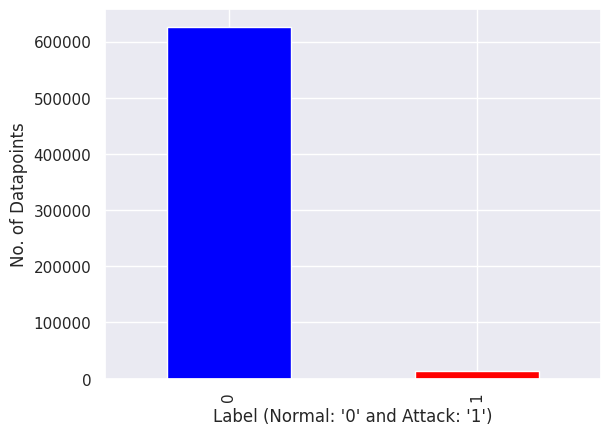

In [ ]:
## Checking for normal and anomalous data distribution
## (Normal: '0' and Attack: '1')
sns.set(style="darkgrid")

data['Label'].value_counts().plot.bar(color=['blue', 'red'])

plt.xlabel("Label (Normal: '0' and Attack: '1')")
plt.ylabel("No. of Datapoints")
plt.show()

# Data Preprocessing






## 2.1 Checking for hexadecimal data:

In [ ]:
## Checking for features that contains hexadecimal values
hexCols = []
for col in data.columns:
  count = data[col].astype(str).str.contains('0x').sum()
  if count>0:
    hexCols.append(col)
  print("{0} feature contains {1} hexadecimal values".format(col, count))

srcip feature contains 0 hexadecimal values
sport feature contains 6 hexadecimal values
dstip feature contains 0 hexadecimal values
dsport feature contains 56 hexadecimal values
proto feature contains 0 hexadecimal values
state feature contains 0 hexadecimal values
dur feature contains 0 hexadecimal values
sbytes feature contains 0 hexadecimal values
dbytes feature contains 0 hexadecimal values
sttl feature contains 0 hexadecimal values
dttl feature contains 0 hexadecimal values
sloss feature contains 0 hexadecimal values
dloss feature contains 0 hexadecimal values
service feature contains 0 hexadecimal values
Sload feature contains 0 hexadecimal values
Dload feature contains 0 hexadecimal values
Spkts feature contains 0 hexadecimal values
Dpkts feature contains 0 hexadecimal values
swin feature contains 0 hexadecimal values
dwin feature contains 0 hexadecimal values
stcpb feature contains 0 hexadecimal values
dtcpb feature contains 0 hexadecimal values
smeansz feature contains 0 hexad

In [ ]:
## printing the columns with hexadecimal values
print('Features with hexadecimal values are:',hexCols)

Features with hexadecimal values are: ['sport', 'dsport']


In [ ]:
## Removing the hexadecimal rows based on their index
hexRows = []

for col in hexCols:
    mask = data[col].astype(str).str.contains('0x')
    hexRows.extend(mask[mask].index.tolist())

hexRows = list(set(hexRows))
## Removing the rows that contains these hexadecimal values
data = data.drop(hexRows)

print("Dimensions of the data after modification are:", data.shape)

Dimensions of the data after modification are: (640726, 49)


## 2.2  Identify categorical and numerical features

Getting the names of the features which are categorical and which are numeric

In [ ]:
## Getting the categorical columns
catCols = data.select_dtypes('object').columns
catCols = catCols.tolist()

## Getting the numeric columns
numCols = data._get_numeric_data().columns
numCols = numCols.tolist()


print("Categorical columns are:",catCols, '\n')
print("Numerical columns are:", numCols)

Categorical columns are: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'attack_cat'] 

Numerical columns are: ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']


In [ ]:

## Dropping the attack_cat column(Because we don't want to encode it)
catCols.remove('attack_cat')
print(catCols)

['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service']


In [ ]:
## function for checking unique data in columns
def uniq(data, fea):
  uniq = len(np.unique(data[fea]))
  # Printing the results
  print("Unique {0} feature data values are {1}".format(fea, uniq))

## Checking no. of unique values in each columns of the dataset
for col in data.columns:
  uniq(data, col)

Unique srcip feature data values are 40
Unique sport feature data values are 64539
Unique dstip feature data values are 44
Unique dsport feature data values are 62220
Unique proto feature data values are 134
Unique state feature data values are 14
Unique dur feature data values are 243827
Unique sbytes feature data values are 7947
Unique dbytes feature data values are 11898
Unique sttl feature data values are 13
Unique dttl feature data values are 11
Unique sloss feature data values are 275
Unique dloss feature data values are 572
Unique service feature data values are 13
Unique Sload feature data values are 391838
Unique Dload feature data values are 403499
Unique Spkts feature data values are 715
Unique Dpkts feature data values are 1086
Unique swin feature data values are 12
Unique dwin feature data values are 4
Unique stcpb feature data values are 441843
Unique dtcpb feature data values are 441640
Unique smeansz feature data values are 1288
Unique dmeansz feature data values are 13

Since, the service feature contains '-' as unique value. We are removing it and None in it's place. There may other columns present which will encounter the same problem. So, doing this for every feature present in the dataset.

In [ ]:
data['service'].unique()
idx_rm = np.array(data[data['service'] == '-'].index)
## no. of rows associated with '-'
print("No. of rows with '-':", len(idx_rm))

No. of rows with '-': 388508


In [ ]:
def rmValues(data, fea):
  data[fea] = np.where(data[fea]=='-', 'other', data[fea])
  return data
data = rmValues(data, data.columns)



## Checking if our function has done the job
data['service'].unique()

array(['dns', 'other', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
       'snmp', 'ssl', 'irc', 'radius', 'dhcp'], dtype=object)

In [ ]:
## ct_state_ttl is also a categorical feature
data['ct_state_ttl'].unique()

array([0, 2, 1, 3, 4, 6, 5], dtype=object)

In [ ]:
## trans_depth is also a categorical feature in our dataset
data['trans_depth'].unique()

array([0, 1, 2, 3, 4, 8], dtype=object)

In [ ]:
## Checking the no. of unique ports susceptible to attack
susceptible_sports = data[data['Label'] == 1]['sport']
susceptible_dsports = data[data['Label'] == 1]['dsport']
print("No. of unique ports on which attack happended:",len(susceptible_sports.unique()))

No. of unique ports on which attack happended: 9607


Creating a new feature time difference 'TimeDiff' based on difference between starting and loading time.

In [ ]:
## Creating a new feature based on time
data['TimeDiff'] = data['Ltime'] - data['Stime']
data = data.drop(['Stime', 'Ltime'], axis=1)
print("Dimensions of the modified dataset are:", data.shape)

Dimensions of the modified dataset are: (640726, 48)


In [ ]:
## Adding integer categorical columns to the catCols
catCols.append('ct_state_ttl')
catCols.append('is_ftp_login')
catCols.append('is_sm_ips_ports') ## Binary feature
catCols.append('trans_depth')

## Adding TimeDiff as new
numCols.append("TimeDiff")

## Dropping the categorical columns from numCols
numCols.remove("Label")
numCols.remove("is_ftp_login")
numCols.remove("is_sm_ips_ports")
numCols.remove("trans_depth")
numCols.remove('Stime')
numCols.remove('Ltime')


## Printing the arrays
print("Categorical columns are:",catCols, '\n')
print("Numerical columns are:", numCols)

Categorical columns are: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_state_ttl', 'is_ftp_login', 'is_sm_ips_ports', 'trans_depth'] 

Numerical columns are: ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'TimeDiff']


In [ ]:
## Final shape of the data after remving the rows
data.shape

(640726, 48)

In [ ]:
## No. of attacks after modifications
data[data['Label'] == 1].shape

(14278, 48)

##2.3 Checking relation between indepent and dependent variables

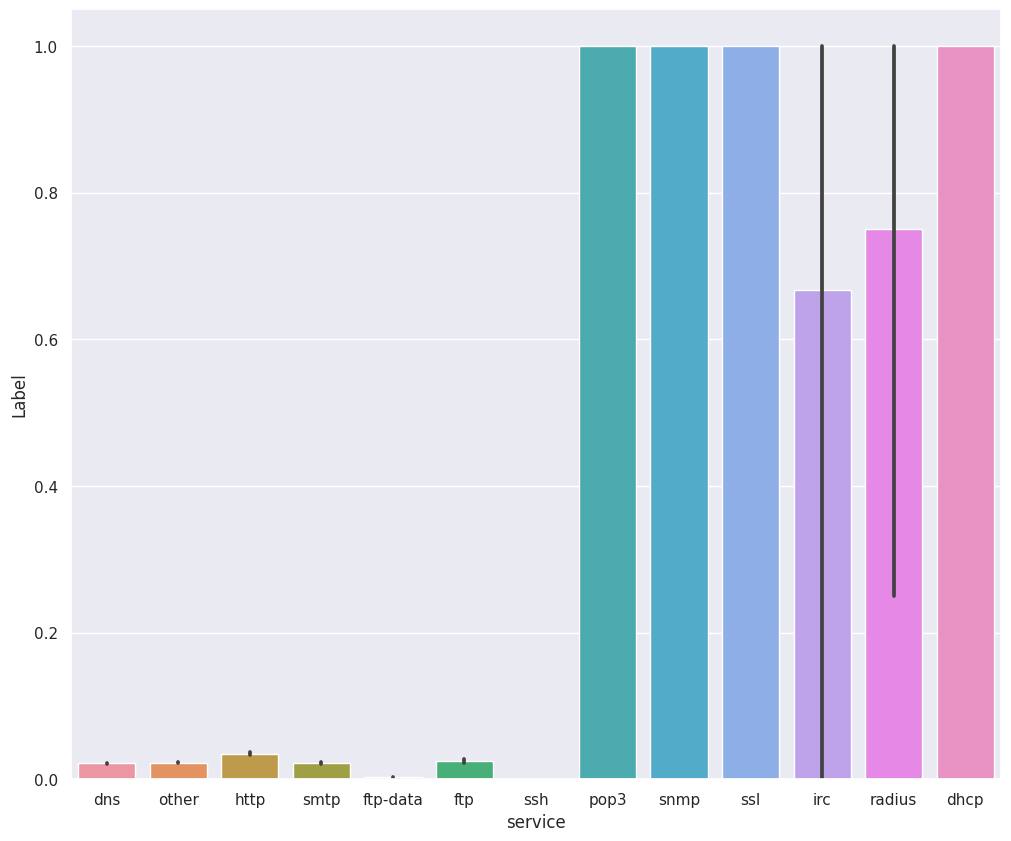

In [ ]:
## Checking the relation between the label and servie types
plt.figure(figsize=(12, 10))
sns.barplot(x='service', y="Label", data=data)
plt.show()

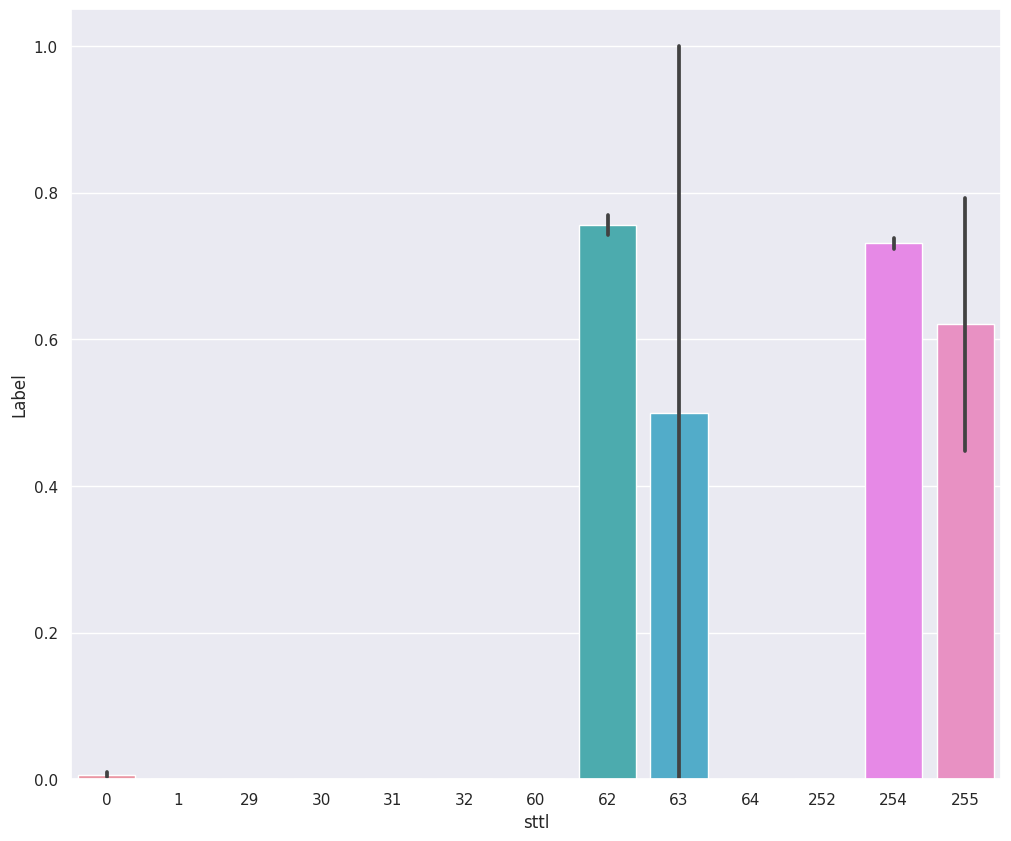

In [ ]:
## Checking the relation between the label and sttl types
plt.figure(figsize=(12, 10))
sns.barplot(x="sttl", y="Label", data=data)
plt.show()

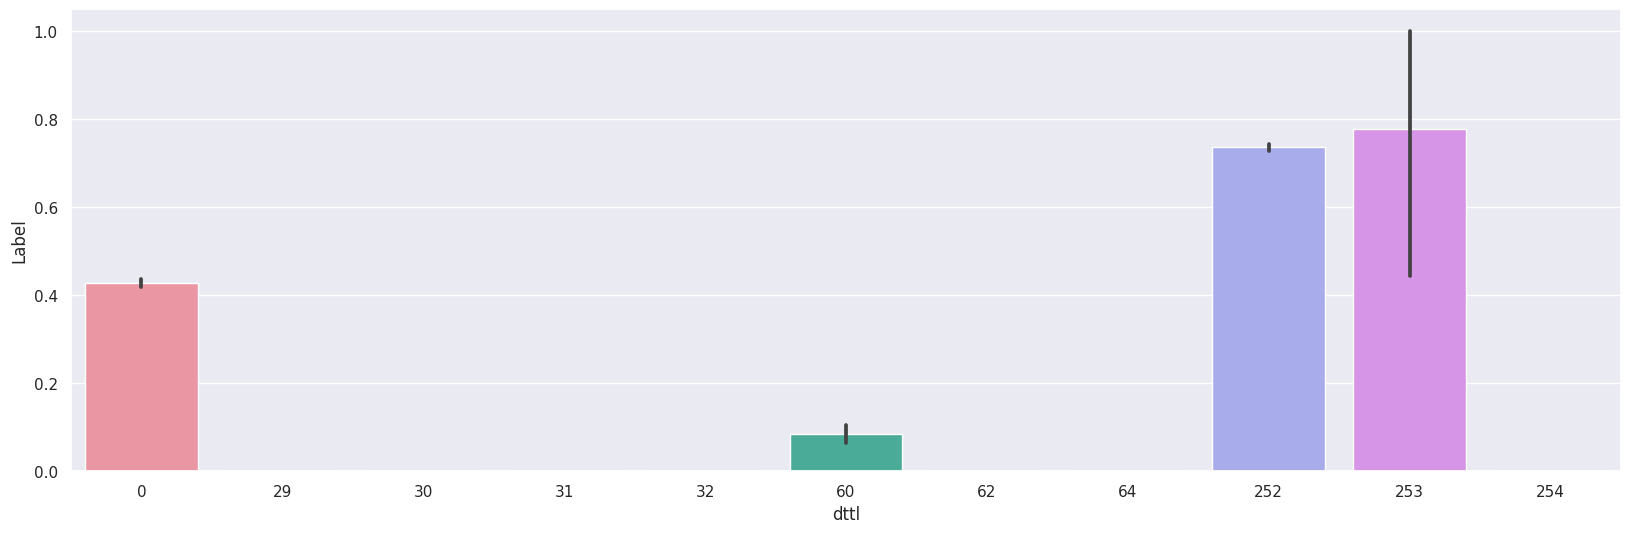

In [ ]:
## Checking the relation between the label and dttl

plt.figure(figsize=(20, 6))
sns.barplot(x="dttl", y="Label", data=data)
plt.show()

Tried one-hot encoding method for some of the features but the results were not good as expected

In [ ]:
## For categorical data which has less than 20 unique values,
## we will one hot encode them and on others we will encode differently to
## load on our system
#oneHotcols = []
#for col in catCols:
  #if len(data[col].unique())<=20:
    #oneHotcols.append(col)
#print('Columns on which one hot encoding to use:', oneHotcols)

#catCols = [col for col in catCols if col not in oneHotcols]

#print("Features on which we intend to do label encoding:",catCols)

> Getting the indicies of rows where this is happening and removing them from the dataset.

In [ ]:
data.describe()

srcip   sport          dstip  dsport   proto   state       dur  \
count       640726  640726         640726  640726  640726  640726  640726.0   
unique          40   64539             44   62220     134      14  243827.0   
top     59.166.0.2       0  149.171.126.4      53     tcp     FIN       0.0   
freq         62850    4369          62883  122578  457028  450611    2207.0   

        sbytes  dbytes    sttl  ...  ct_srv_src  ct_srv_dst  ct_dst_ltm  \
count   640726  640726  640726  ...      640726      640726      640726   
unique    7947   11898      13  ...          43          40          41   
top        146     178      31  ...           1           1           2   
freq     82522   82391  612562  ...       87057       87956      142545   

       ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
count       640726            640726            640726          640726   
unique          45                34                32              33   
top              2                 1                 1               1   
freq        126985            519732            598685          380580   

        attack_cat   Label  TimeDiff  
count       640726  640726    640726  
unique          10       2        69  
top         normal       0         0  
freq        626448  626448    485543  

[4 rows x 48 columns]

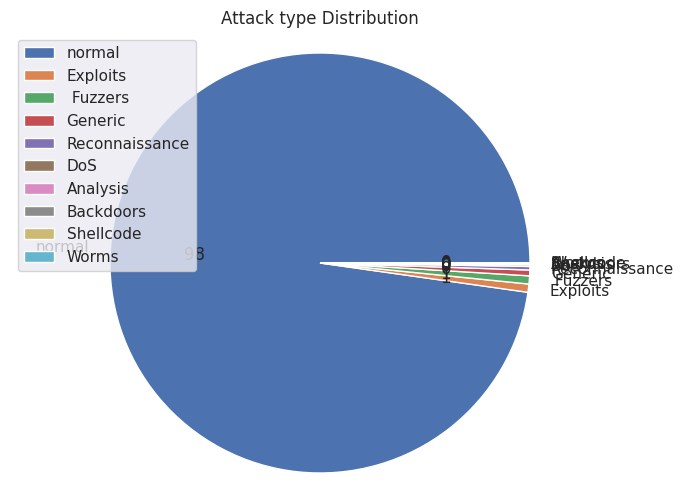

In [ ]:
catCounts = data['attack_cat'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(catCounts, labels = catCounts.index, autopct='%1.0f')
plt.title("Attack type Distribution")
plt.axis('equal')
plt.legend(labels= catCounts.index)
# Display the chart
plt.show()

In [ ]:
## Getting the no. of attacks in each category
for i in range(len(catCounts)):
  print(" {} cases are :{}".format(catCounts.index[i], catCounts[i]))

 normal cases are :626448
 Exploits cases are :4042
  Fuzzers cases are :3991
 Generic cases are :2833
 Reconnaissance cases are :1740
 DoS cases are :825
 Analysis cases are :301
 Backdoors cases are :299
 Shellcode cases are :223
 Worms cases are :24


In [ ]:
## Total no. of attacks
data[data['Label'] == 1].shape

(14278, 48)

In [ ]:
## Dimension of the whole data
data.shape

(640726, 48)

##2.4 Feature Engineering

In [ ]:
## Installing the category-encoder library
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.6 MB/s eta 0:00:00


> One-hot encoding didn't work as expected so dropped the idea.

In [ ]:
#data[oneHotcols] = data[oneHotcols].astype('object')
#Onehot_data = pd.get_dummies(data[oneHotcols])
#data_mod = Onehot_data.join(data[np.concatenate((catCols, numCols, ['Label', 'attack_cat']))])
#data_mod.shape

In [ ]:
## Using sklearn Labelencoder to convert into categorical features
from sklearn.preprocessing import LabelEncoder

## Using sklearn libary to convert nominal features into categorical features
## Defining a function so we don't have to repeat again
def convertToCategorical(s, data):
  encoder = LabelEncoder()
  encoded = encoder.fit_transform(data[s])
  return encoded

## Converting dataset features into categorical
for col in catCols:
  data[col] = convertToCategorical(col, data)

## Frequency encoding the label encoded features
from sklearn.preprocessing import OneHotEncoder
from category_encoders import CountEncoder

## using frequency encoding to encode categorical variables
data = CountEncoder(cols = catCols, normalize = True).fit(data).transform(data)

## 2.5 Splitting the Dataset

In [ ]:
## Dividing data into normal and abnormal attacks
normalData = np.array(data[data['Label']==0])
abnormalData = np.array(data[data['Label'] == 1])



## Splitting the dataset (70% training, 15% validation, 15% testing)
## Validation will contain normal cases, which is used for tuning the threshold.
## Getting an estimate of number of Rows to get from normal data

nRows = int(np.round(normalData.shape[0]*.70))
print("No. of rows to get for training data: ",nRows)

No. of rows to get for training data:  474450


In [ ]:
## Shape of anomalous data
abnormalData.shape

(22215, 49)

In [ ]:
## getting the required data at random using numpy
indices = np.random.choice(normalData.shape[0], size = nRows,
                           replace = False)
X_train = normalData[indices,:]


## Print the shape of the modified data
print(X_train.shape)

(438514, 48)


In [ ]:
## Getting the remaining normal data
mask = np.logical_not(np.isin(np.arange(normalData.shape[0]), indices))
normalData = normalData[mask,:]

## Printing the dimension after modification
normalData.shape

(187934, 48)

In [ ]:
## Creating a validation set of normal cases i.e. 0
nRows = (normalData.shape[0])// 2
print("No. of Rows to get for Validation data:", nRows)

indices = np.random.choice(normalData.shape[0], size = nRows,
                           replace = False)
X_val = normalData[indices,:]


## Print the shape of the modified data
print("Dimension of the Validation set:", X_val.shape)

No. of Rows to get for Validation data: 93967
Dimension of the Validation set: (93967, 48)


In [ ]:
## Getting the remaining normal data
mask = np.logical_not(np.isin(np.arange(normalData.shape[0]), indices))
normalData = normalData[mask,:]

## Printing the dimension after modification
normalData.shape

(93967, 48)

In [ ]:
## Combining remaining normal with abnormal cases
remainingData = np.concatenate((normalData, abnormalData), axis=0)

## Shuffling the combined data
np.random.shuffle(remainingData)

## Storing the data for testing
X_test = remainingData

In [ ]:
## Print the shape of test data
print("Dimension of the test set:", X_test.shape)

Dimension of the test set: (108245, 48)


## 2.6 Removing the Labels and unwanted features

In [ ]:
################ Removing the unwanted columns of the Dataset ##################

## Converting back to pandas dataFrame for preprocessing
feaNames = data.columns
X_train = pd.DataFrame(X_train, columns = feaNames)
X_val = pd.DataFrame(X_val, columns = feaNames)
X_test = pd.DataFrame(X_test, columns = feaNames)

## Dropping columns named record start time and end time as well as Labels

y_train = X_train["Label"].tolist()


X_train = X_train.drop("Label", axis=1)
X_train = X_train.drop("attack_cat", axis=1)

y_val = X_val["Label"].tolist()
X_val = X_val.drop("Label", axis=1)
X_val = X_val.drop("attack_cat", axis=1)


y_test = X_test["Label"].tolist()
X_test = X_test.drop("Label", axis=1)
X_test = X_test.drop("attack_cat", axis=1)


In [ ]:
## Checking the changes are made
X_train.head()

srcip     sport     dstip    dsport     proto     state       dur  \
0  0.094018  0.000014  0.093197  0.043532  0.713297  0.703282  0.602904   
1  0.097397  0.000017  0.092984  0.000179  0.713297  0.703282  0.223248   
2  0.097118  0.000012  0.098143  0.000016  0.713297  0.703282   0.49512   
3  0.097408  0.000016  0.092887  0.000009  0.279784  0.278024  0.455122   
4  0.097118  0.000014  0.094287  0.000005  0.713297  0.703282  0.060399   

  sbytes dbytes sttl  ... is_ftp_login ct_ftp_cmd ct_srv_src ct_srv_dst  \
0  37218   3276   31  ...     0.983161          0          2          1   
1   8928    320   31  ...     0.983161          0          3          3   
2   4688   3080   31  ...     0.983161          0          3         11   
3    536    304   31  ...     0.983161          0          5          9   
4    998   9069   31  ...     0.983161          0         12          5   

  ct_dst_ltm ct_src_ ltm ct_src_dport_ltm ct_dst_sport_ltm ct_dst_src_ltm  \
0          1           3                1                1              1   
1          3           3                1                1              2   
2          1           1                1                1              1   
3          3           2                1                1              1   
4          1           4                1                1              1   

  TimeDiff  
0        0  
1        1  
2        1  
3        0  
4        0  

[5 rows x 46 columns]

## 2.7 Min-max Scaling of the features

In [ ]:
################### Min_max features in the dataset ############################

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
## Doing Min-max scaling
X_train[numCols] = scaler.fit_transform(X_train[numCols])

## Doing Min-max scaling on validation and test data
X_val[numCols] = scaler.transform(X_val[numCols])

X_test[numCols] = scaler.transform(X_test[numCols])

In [ ]:
## Checking if the Min-max scaling is as expected
X_train.head()

srcip     sport     dstip    dsport     proto     state       dur  \
0  0.094018  0.000014  0.093197  0.043532  0.713297  0.703282  0.000069   
1  0.097397  0.000017  0.092984  0.000179  0.713297  0.703282  0.000025   
2  0.097118  0.000012  0.098143  0.000016  0.713297  0.703282  0.000057   
3  0.097408  0.000016  0.092887  0.000009  0.279784  0.278024  0.000052   
4  0.097118  0.000014  0.094287  0.000005  0.713297  0.703282  0.000007   

     sbytes    dbytes      sttl  ...  is_ftp_login  ct_ftp_cmd  ct_srv_src  \
0  0.024961  0.001996  0.121569  ...      0.983161         0.0    0.023256   
1  0.005988  0.000195  0.121569  ...      0.983161         0.0    0.046512   
2  0.003144  0.001876  0.121569  ...      0.983161         0.0    0.046512   
3  0.000359  0.000185  0.121569  ...      0.983161         0.0    0.093023   
4  0.000669  0.005525  0.121569  ...      0.983161         0.0    0.255814   

  ct_srv_dst  ct_dst_ltm  ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
0   0.000000     0.00000     0.040816               0.0               0.0   
1   0.048780     0.04878     0.040816               0.0               0.0   
2   0.243902     0.00000     0.000000               0.0               0.0   
3   0.195122     0.04878     0.020408               0.0               0.0   
4   0.097561     0.00000     0.061224               0.0               0.0   

   ct_dst_src_ltm  TimeDiff  
0        0.000000  0.000000  
1        0.027027  0.000112  
2        0.000000  0.000112  
3        0.000000  0.000000  
4        0.000000  0.000000  

[5 rows x 46 columns]

In [ ]:
## Getting the shape of the dataset
print("Shape of the training data:", X_train.shape)
print("Shape of the validation data:", X_val.shape)
print("Shape of the test data:", X_test.shape)

Shape of the training data: (438514, 46)
Shape of the validation data: (93967, 46)
Shape of the test data: (108245, 46)


# Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Set the seed for TensorFlow to make results reproducible
tf.random.set_seed(42)


## Converting the arrays to tensor
X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype = tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype = tf.float32)

## 3.1 Model Architecture

In [ ]:
## Building an autoEncoder using(https://www.tensorflow.org/tutorials/generative/)
class autoEncoder(Model):
  def __init__(self):
        super(autoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(8, activation="LeakyReLU")])

        self.decoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(46, activation="sigmoid")])


  def call(self, input):
    encoded = self.encoder(input)
    decoded = self.decoder(encoded)
    return decoded

## 3.2 Doing k-fold cross validation:

In [ ]:
## Built an autoencoder using this
## tutorial https://www.tensorflow.org/tutorials/generative/autoencoder
## Concatenating training and validation data
X = np.concatenate((X_train, X_val), axis=0)
kf = KFold(n_splits=5)  ## Defining the number of folds for cross-validation

fold_scores = []  # To store the scores for each fold

# Perform cross-validation
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    class autoEncoder(Model):
       def __init__(self):
        super(autoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(8, activation="LeakyReLU")])

        self.decoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(46, activation="sigmoid")])


       def call(self, input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return decoded
    # Initialize a new instance of the autoEncoder model for each fold
    autoEncoder = autoEncoder()
    # Compile the model
    autoEncoder.compile(optimizer='adam', loss='mae')

    # Fit the model to the current fold's training data
    fittedModel = autoEncoder.fit(X_train_fold, X_train_fold, epochs=11,
      batch_size=128, validation_data=(X_val_fold, X_val_fold), shuffle=True)

    # Evaluate the model on the current fold's validation data and store the score
    fold_score = autoEncoder.evaluate(X_val_fold, X_val_fold)
    fold_scores.append(fold_score)

# Calculate the average score across all folds
average_score = np.mean(fold_scores)

# Print the average score
print("Average score:", average_score)

Epoch 1/11
3328/3328 [==============================] - 10s 3ms/step - loss: 0.0252 - val_loss: 0.0127
Epoch 2/11
3328/3328 [==============================] - 8s 2ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 3/11
3328/3328 [==============================] - 9s 3ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 4/11
3328/3328 [==============================] - 8s 2ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 5/11
3328/3328 [==============================] - 9s 3ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 6/11
3328/3328 [==============================] - 11s 3ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 7/11
3328/3328 [==============================] - 11s 3ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 8/11
3328/3328 [==============================] - 10s 3ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 9/11
3328/3328 [==============================] - 8s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 10/11
3328/3328 [==============================] - 9s 3ms/step - loss: 0

## 3.3 Training the AutoEncoder

In [ ]:
## Our define model architecture for autoencoder
class autoEncoder(Model):
  def __init__(self):
        super(autoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(8, activation="LeakyReLU")])

        self.decoder = tf.keras.Sequential([
         layers.Dense(36, activation="LeakyReLU"),
         layers.Dense(46, activation="sigmoid")])


  def call(self, input):
    encoded = self.encoder(input)
    decoded = self.decoder(encoded)
    return decoded
autoEncoder = autoEncoder()

In [ ]:
## Fitting the training data into model above and using adam optimizer and
## using mean square logarithmic loss function


# Defining early stopping criteria for regularisation
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

## Using the adam optimizer and mean absolute error loss function
autoEncoder.compile(optimizer = 'adam', loss = 'mae')
fittedModel = autoEncoder.fit(X_train, X_train, epochs = 22, batch_size = 64,
               validation_data=(X_val, X_val), shuffle=True, callbacks=[early_stopping])

Epoch 1/22
6852/6852 [==============================] - 19s 3ms/step - loss: 0.0207 - val_loss: 0.0115
Epoch 2/22
6852/6852 [==============================] - 17s 3ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 3/22
6852/6852 [==============================] - 20s 3ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 4/22
6852/6852 [==============================] - 17s 3ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 5/22
6852/6852 [==============================] - 20s 3ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 6/22
6852/6852 [==============================] - 19s 3ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 7/22
6852/6852 [==============================] - 20s 3ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 8/22
6852/6852 [==============================] - 19s 3ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 9/22
6852/6852 [==============================] - 19s 3ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 10/22
6852/6852 [==============================] - 18s 3ms/step - l

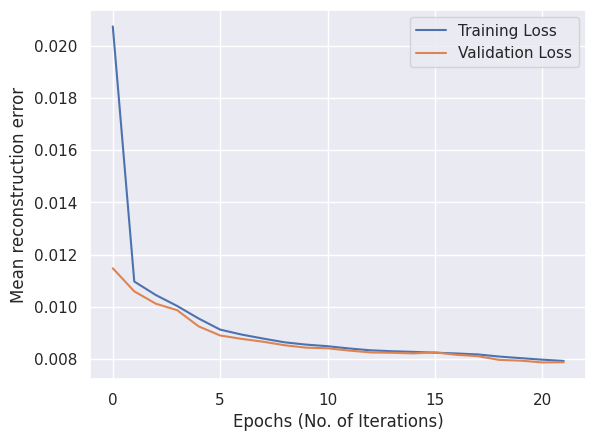

In [ ]:
## Plotting the training and validation loss
plt.plot(fittedModel.history["loss"], label="Training Loss")
plt.plot(fittedModel.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs (No. of Iterations)")
plt.ylabel("Mean reconstruction error")
plt.legend()

plt.savefig('/content/drive/MyDrive/autoEncoderTrainLoss.png')

13704/13704 [==============================] - 21s 2ms/step


Text(0, 0.5, 'Datapoints')

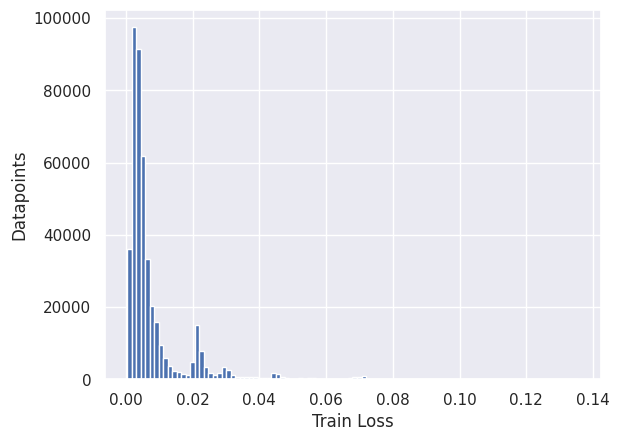

In [ ]:
## Deciding a threshold based on the training set
reConstruction = autoEncoder.predict(X_train)
trainLoss = tf.keras.losses.mae(reConstruction, X_train)

## Plotting the loss
plt.hist(trainLoss[None, :], bins= 100)
plt.xlabel("Train Loss")
plt.ylabel("Datapoints")

In [ ]:
## Getting test Statistics for reConstruction training Loss
mean = np.mean(trainLoss.numpy())
maxVal = np.max(trainLoss.numpy())
minVal = np.min(trainLoss.numpy())
std = np.std(trainLoss.numpy())
perInt = np.percentile(trainLoss.numpy(), [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("95% confidence interval is:", perInt)

Mean: 0.0079395035
Max: 0.13549843
Min: 0.0003615392
Standard Deviation: 0.010259468
95% confidence interval is: [0.00118454 0.03896145]


In [ ]:
## Used this as refrence (https://www.tensorflow.org/tutorials/generative/)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve


def predictModel(model, XX, threshold):
  reConstruction = model(XX)
  loss = tf.keras.losses.mae(reConstruction, XX)
  return tf.math.greater(loss, threshold)

def Stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("F1-score = {}".format(f1_score(labels, predictions, zero_division=1)))
  print("Precision = {}".format(precision_score(labels, predictions, zero_division=1)))
  print("Recall = {}".format(recall_score(labels, predictions, zero_division=1)))
  print("AUC-ROC = {}".format(roc_auc_score(labels, predictions)))

In [ ]:
## Taken plotting code from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
def plot_anomaly(y, error, best_threshold):
  Df = pd.DataFrame({'error': error, 'true':y }).groupby('true')
  figure, axes = plt.subplots(figsize=(10, 6))

  for name, group in Df:
    axes.plot(group.index, group.error, marker='*' if name==1 else 'x', linestyle='',
              color= 'crimson' if name==1 else 'limegreen', label="Anomaly" if name==1
              else "Normal")
  axes.hlines(best_threshold, axes.get_xlim()[0], axes.get_xlim()[1],
              color = 'darkblue', zorder = 100, label = 'Threshold')
  axes.legend()
  plt.title("Anomaly detection")
  plt.ylabel("Reconstruction Error")
  plt.xlabel("Observations")
  plt.show()
def plot_confusion_matrix(confusion_matrix, labels):
    figure, axes = plt.subplots(figsize=(8, 6))
    heatmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
                          cbar=False)
    heatmap.set_xticklabels(labels, rotation=45, ha='right')
    heatmap.set_yticklabels(labels, rotation=0)
    axes.set_xlabel('Predicted')
    axes.set_ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
## Getting rough idea of threshold
#threshold = np.mean(trainLoss) + 1.96 * np.std(trainLoss)
threshold_train = perInt[1]
print("Threshold is:", threshold_train)

Threshold is: 0.03896144600585101


In [ ]:
## Stats based on this threshold=0.020
preds = predictModel(autoEncoder, X_test,  threshold_train)
Stats(preds, y_test)

Accuracy = 0.978594854265786
F1-score = 0.9248678621226369
Precision = 0.8611194976148784
Recall = 0.9988093570528085
AUC-ROC = 0.9871663395350562


2937/2937 [==============================] - 5s 2ms/step


Text(0, 0.5, 'Datapoints')

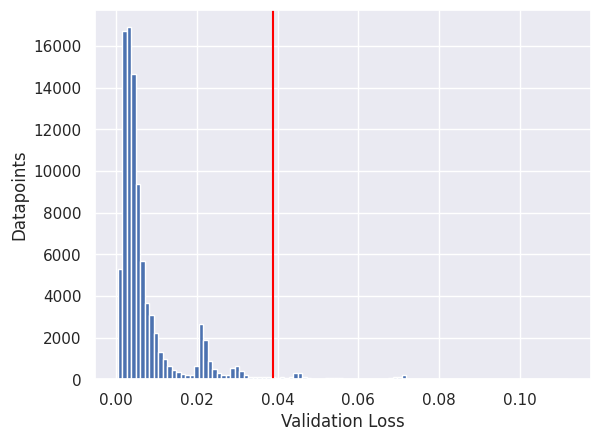

In [ ]:
## Reconstruction for validation data
reConstructionVal = autoEncoder.predict(X_val)
LossVal = tf.keras.losses.mae(reConstructionVal, X_val)

## Plotting the loss
plt.hist(LossVal[None, :], bins=100)
plt.axvline(threshold_train, color='red')
plt.xlabel("Validation Loss")
plt.ylabel("Datapoints")

In [ ]:
## Getting test Statistics for reConstruction validation Loss
mean = np.mean(LossVal.numpy())
maxVal = np.max(LossVal.numpy())
minVal = np.min(LossVal.numpy())
std = np.std(LossVal.numpy())
perInt = np.percentile(LossVal.numpy(), [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("95% confidence interval is:", perInt)

Mean: 0.007877302
Max: 0.112033926
Min: 0.00038319486
Standard Deviation: 0.010207352
95% confidence interval is: [0.00118696 0.03839385]


In [ ]:
## Getting the threshold based on validation set
threshold_val = perInt[1]
print("Threshold based on validation is:", threshold_val)

Threshold based on validation is: 0.03839385099709031


In [ ]:
## Stats based on this threshold of validation
preds = predictModel(autoEncoder, X_test,  threshold_val)
Stats(preds, y_test)
## Getting the classification report
print(classification_report(y_test, preds))

Accuracy = 0.9781791306757818
F1-score = 0.9235252217833323
Precision = 0.858742774566474
Recall = 0.9988793948732315
AUC-ROC = 0.9869565916654407
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93967
           1       0.86      1.00      0.92     14278

    accuracy                           0.98    108245
   macro avg       0.93      0.99      0.96    108245
weighted avg       0.98      0.98      0.98    108245



In [ ]:
## Getting recosntruction loss for test set
reConstructionTest = autoEncoder.predict(X_test)
Loss_test = tf.keras.losses.mae(reConstructionTest, X_test)

3383/3383 [==============================] - 8s 2ms/step


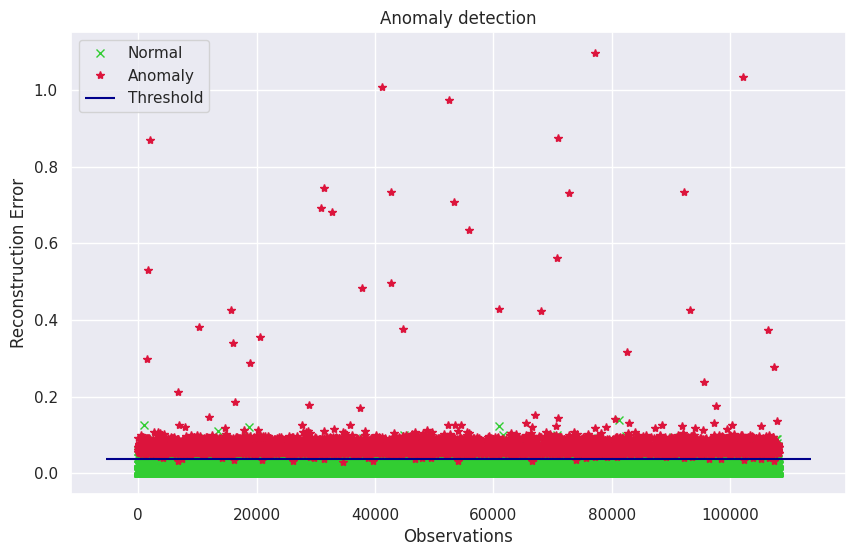

In [ ]:
## Plotting the reconstruction error of test set and the threshold separating
## normal and anomalous cases
plot_anomaly(y_test, Loss_test, threshold_val)

In [ ]:
## Doing a grid serch to select the threshold based on validation set
def find_best_threshold(model, X_val, y_val):
  max_error = -9999999
  for i in range(0,30):


    reConstruction = autoEncoder.predict(X_val)
    loss = tf.keras.losses.mae(reConstruction, X_val).numpy()
    # Calculate maximum construction error
    meanconstruction_error = np.max(np.mean(loss)+ np.std(loss))

    # Update best threshold and maximum construction error if necessary
    if meanconstruction_error > max_error:
        max_error = meanconstruction_error


  return max_error
  ## Getting the best threshold
bestThreshold = find_best_threshold(autoEncoder, X_val, y_val)
print("Best Threshold:", bestThreshold)

2937/2937 [==============================] - 6s 2ms/step
Best Threshold: 0.018084655


In [ ]:
## Metrics for the best threshold
predsTest = predictModel(autoEncoder, X_test,  bestThreshold)
Stats(predsTest, y_test)

Accuracy = 0.8853711487828537
F1-score = 0.6970998925886144
Precision = 0.5350370981038747
Recall = 1.0
AUC-ROC = 0.9339768216501538


In [ ]:
## Getting error for test set
reConstructionTest = autoEncoder.predict(X_test)
Loss_test = tf.keras.losses.mae(reConstructionTest, X_test)

3383/3383 [==============================] - 5s 1ms/step


## 3.4 Visualizing the anomaly detection using AE

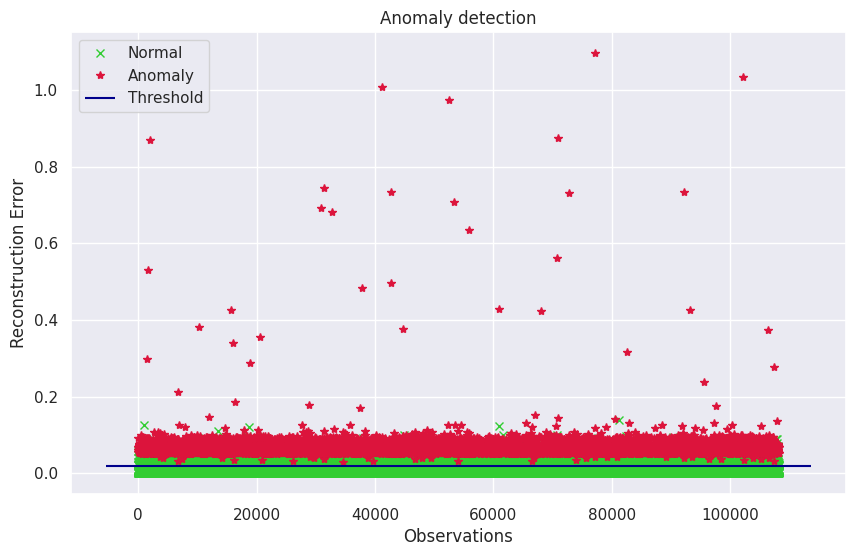

In [ ]:
## Visualizing the results for reconstruction error on test set
plot_anomaly(y_test, Loss_test, bestThreshold)

## 3.5 Confusion matrix

Confusion Matrix:
[[81559 12408]
 [    0 14278]]


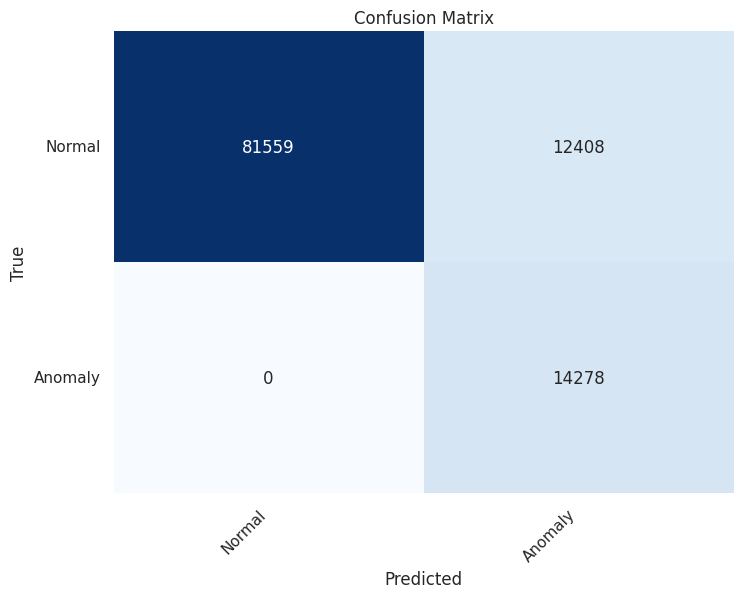

AUC-ROC Score: 0.9339768216501538


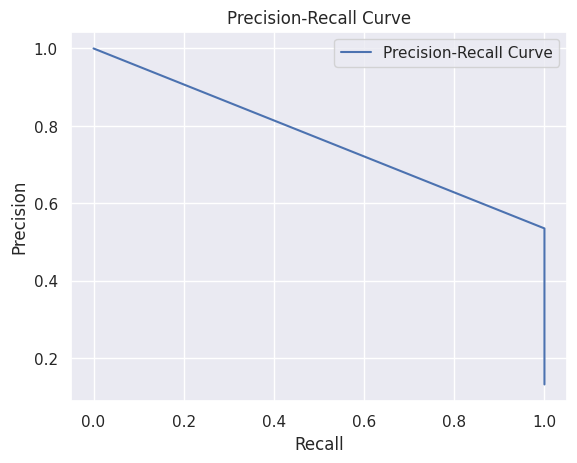

In [ ]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predsTest)
print("Confusion Matrix:")
print(cm)

## Created function to create confusion matrix takes matrix as input returns the
## plot
def plot_confusion_matrix(confusion_matrix, labels):
    figure, axes = plt.subplots(figsize=(8, 6))
    heatmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
                          cbar=False)
    heatmap.set_xticklabels(labels, rotation=45, ha='right')
    heatmap.set_yticklabels(labels, rotation=0)
    axes.set_xlabel('Predicted')
    axes.set_ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

## plotting the confusion matrix
plot_confusion_matrix(cm, np.array(['Normal', 'Anomaly']))


# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, predsTest)
print("AUC-ROC Score:", auc_roc)

# Calculate precision and recall values for plotting the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predsTest)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Variational Autoencoder

## 4.1 Fitting an Variational autoencoder

In [ ]:
## Taken code refrence from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)
## Loading the required libraries
## Loading the required libraries
from re import VERBOSE
from keras import optimizers
from keras.layers import Input, Dropout, Embedding, LSTM, Lambda
from keras.losses import mse
from keras.optimizers import Adam
from keras import backend as B
from keras.models import Sequential, Model


## Creating an class for variational autoencoder(VAE)
class VariationalAutoencoder():
    def __init__(self, input_dim, encoder_dim, latent_dim, decoder_dim):
        self.input_dim = input_dim
        self.encoder_dim = encoder_dim
        self.latent_dim = latent_dim
        self.decoder_dim = decoder_dim
        self.vae = None
    ## function for Reparameterisation trick to do sampling
    def sample(self, args):
      ## Getting the arguments
        zMean, zLogVar = args
        ## Getting the batch size
        batch = B.shape(zMean)[0]
        dim = B.int_shape(zMean)[1]
        ## Getting the epsilon from standard normal
        epsilon = B.random_normal(shape=(batch, dim))
        return zMean + B.exp(0.5 * zLogVar) * epsilon
    ## function to build the VAE
    def build(self):
      ## Getting the input shapes
        inputs = Input(shape=(self.input_dim,), name='encoderInput')
        Encoder = Dense(self.encoder_dim, activation='LeakyReLU')(inputs)
        zMean = Dense(self.latent_dim, name='zMean')(Encoder)
        zLogVar = Dense(self.latent_dim, name='zLogVar')(Encoder)

        z = Lambda(self.sample, output_shape=(self.latent_dim,), name='z')([zMean, zLogVar])

        ## Encoder
        encoder = Model(inputs, [zMean, zLogVar, z], name='encoder')
        encoder.summary()


        ## Latent-space representation
        latent_inputs = Input(shape=(self.latent_dim,), name='zSampling')
        Code = Dense(self.decoder_dim, activation='LeakyReLU')(latent_inputs)
        outputs = Dense(self.input_dim, activation='sigmoid')(Code)

        ## Decoder
        decoder = Model(latent_inputs, outputs, name='decoder')
        decoder.summary()

        outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, outputs, name='vae')


        ## Reconstruction Loss(=MSE - KL divergence)
        reconstructionLoss = mse(inputs, outputs)
        reconstructionLoss *= self.input_dim

        ## Calculating the KL-divergence loss
        kLloss = 1 + zLogVar - B.square(zMean) - B.exp(zLogVar)
        kLloss = B.sum(kLloss, axis=1)
        kLloss *= -0.5

        vae_loss = B.mean(reconstructionLoss + kLloss)
        vae.add_loss(vae_loss)

        ## Compiling the model
        vae.compile(optimizer='adam', metrics=['accuracy'])
        vae.summary()
        self.vae = vae

    def fit(self, X_train, X_val, batch_size, epochs):
        self.vaeFit = self.vae.fit(X_train, X_train, batch_size=batch_size, epochs=epochs,
                     verbose=1, shuffle=True, validation_data=(X_val, X_val))
    def plotLoss(self):
      plt.plot(self.vaeFit.history["loss"], label="Training Loss")
      plt.plot(self.vaeFit.history["val_loss"], label="Validation Loss")
      plt.xlabel("Epochs (Iterations over entire training set)")
      plt.ylabel("Mean squared reconstruction error")
      plt.legend()
      plt.show()
    def predict(self, XX):
      return self.vae.predict(XX)
    def evaluate(self, XX):
      return self.vae.evaluate(XX, XX, verbose= True)

In [ ]:
## Initializing the model parameters
input_dim = X_train.shape[1]
inputShape = (input_dim,)

## Encoder dimension
encoderDim = 36
## Latent space dimension
latentDim = 8
## Decoder dimesions
decoderDim = 36

## Creating an instance of VariationalAutoencoder(VAE) Class
vae = VariationalAutoencoder(input_dim, encoderDim, latentDim, decoderDim)
## Calling the build inside the class to build an VAE
vae.build()

## Fitting the mode with 22 training iterations and batch_size = 64
vae.fit(X_train, X_val, batch_size=64, epochs = 22)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoderInput (InputLayer)      [(None, 46)]         0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 36)           1692        ['encoderInput[0][0]']           
                                                                                                  
 zMean (Dense)                  (None, 8)            296         ['dense_24[0][0]']               
                                                                                                  
 zLogVar (Dense)                (None, 8)            296         ['dense_24[0][0]']               
                                                                                            

## 4.2 Plotting Train loss and Validation Loss

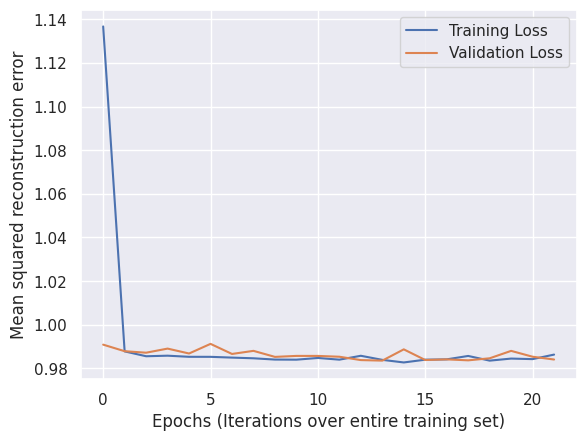

In [ ]:
## Plotting the loss
vae.plotLoss()

## 4.3 Deciding threshold based on Train Loss

13704/13704 [==============================] - 22s 2ms/step


Text(0, 0.5, 'Datapoints')

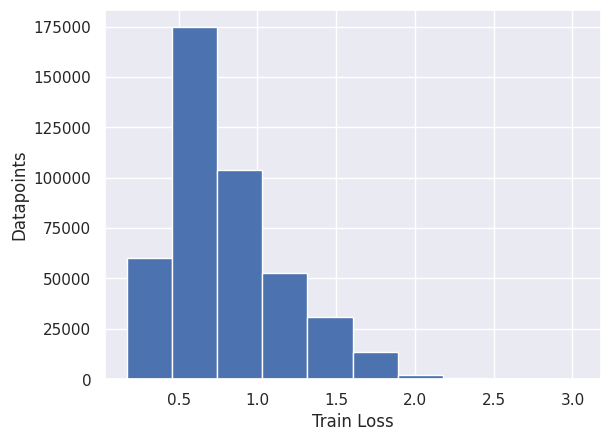

In [ ]:
## Deciding a threshold
reConstruction = vae.predict(X_train)
trainLoss = np.linalg.norm(X_train - reConstruction, axis=-1)

## Plotting the loss
plt.hist(trainLoss)
plt.xlabel("Train Loss")
plt.ylabel("Datapoints")

In [ ]:
## Getting test Statistics for reConstruction training Loss
mean = np.mean(trainLoss)
maxVal = np.max(trainLoss)
minVal = np.min(trainLoss)
std = np.std(trainLoss)
perInt = np.percentile(trainLoss, [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("Spread range interval is:", perInt)

Mean: 0.8002387
Max: 3.0346656
Min: 0.17263745
Standard Deviation: 0.36259854
Spread range interval is: [0.29143052 1.67166655]


>Threshold based on trainLoss

In [ ]:
## Taken plotting code refrence from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)

## Based on the threshold detecting the anomalies and printing the Stats
threshold = mean + std
print('Threshold is:', threshold)
yy_pred = vae.predict(X_test)
yyDist = np.linalg.norm(X_test - yy_pred, axis =-1)
zz = zip(yyDist >= threshold, yyDist)
yLabel = []
testReconsError = []
for idx, (anomaly, yyDist) in enumerate(zz):
  if anomaly:
    yLabel.append(1)
  else:
    yLabel.append(0)
  testReconsError.append(yyDist)
Stats(yLabel, y_test)

Threshold is: 1.1628373
3383/3383 [==============================] - 6s 2ms/step
Accuracy = 0.8561503995565615
F1-score = 0.6470041486250595
Precision = 0.4783293668085677
Recall = 0.9994396974366158
AUC-ROC = 0.9169088618825039


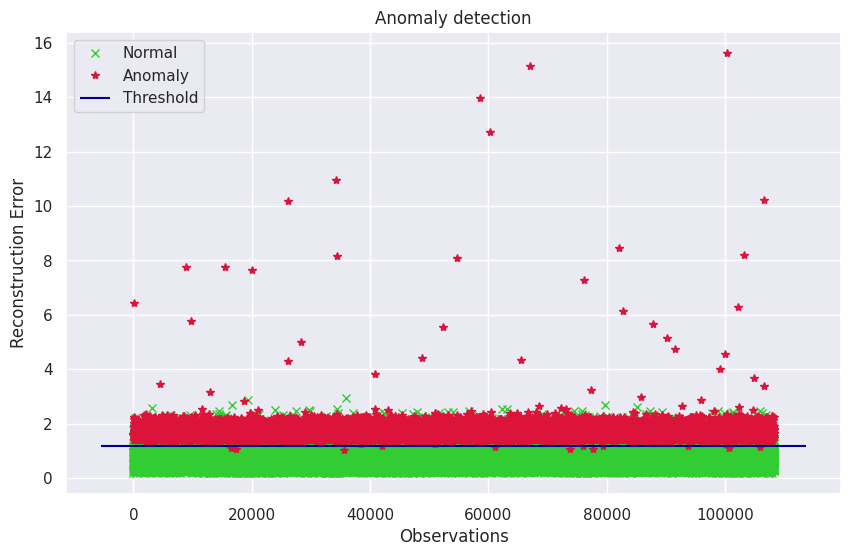

In [ ]:
##Threshold is: 1.1652662
plot_anomaly(y_test, testReconsError, threshold)

## 4.4 Deciding threshold based on Validation Loss

2937/2937 [==============================] - 4s 1ms/step


Text(0, 0.5, 'Datapoints')

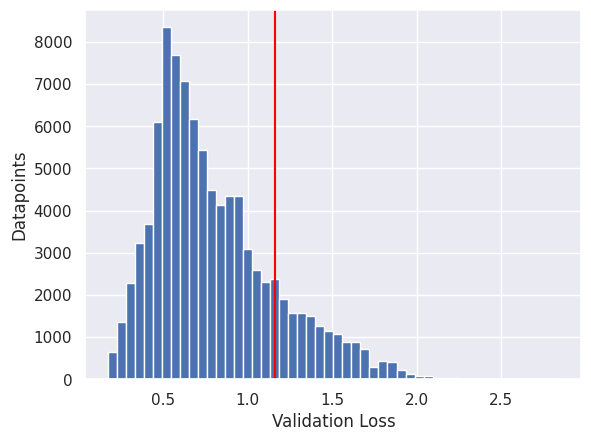

In [ ]:
## Calculating the validation loss
reConstructionVal = vae.predict(X_val)
trainLossVal = np.linalg.norm(X_val - reConstructionVal, axis=-1)

## Plotting the loss
plt.hist(trainLossVal, bins=50)
plt.axvline(threshold, color='red')
plt.xlabel("Validation Loss")
plt.ylabel("Datapoints")

In [ ]:
from matplotlib.transforms import interval_contains
## Getting test Statistics for reConstruction validation Loss
mean = np.mean(trainLossVal)
maxVal = np.max(trainLossVal)
minVal = np.min(trainLossVal)
std = np.std(trainLossVal)
perint = np.percentile(trainLossVal, [2.5, 97.5])

## Printing train Loss statistics
print("Mean:", mean)
print("Max:", maxVal)
print("Min:", minVal)
print("Standard Deviation:", std)
print("Spread range interval is:", perint)

Mean: 0.8004719
Max: 2.8398159
Min: 0.17434429
Standard Deviation: 0.36317518
Spread range interval is: [0.2913793  1.67519702]


In [ ]:
## Taken code refrence from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)


## Threshold based on the validation data=0.060
threshold = perint[1]
print("Threhold is:", threshold)
yy_pred = vae.predict(X_test)
yyDist = np.linalg.norm(X_test - yy_pred, axis =-1)
zz = zip(yyDist >= threshold, yyDist)
yLabel = []
testReconsError = []
for idx, (anomaly, yyDist) in enumerate(zz):
  if anomaly:
    yLabel.append(1)
  else:
    yLabel.append(0)
  testReconsError.append(yyDist)
## Getting the Stats
Stats(yLabel, y_test)

Threhold is: 1.163647
3383/3383 [==============================] - 6s 2ms/step
Accuracy = 0.8581828259965818
F1-score = 0.6502631399084137
Precision = 0.4818841803140301
Recall = 0.9995097352570388
AUC-ROC = 0.9181091835053699


## 4.5 Loss for test data

In [ ]:
## Evaluating loss for test data using VAEs
res = vae.evaluate(X_test)
print("Loss using vae:",res[0])
print("Accuracy using vae:",res[1])


3383/3383 [==============================] - 6s 2ms/step - loss: 1.2895 - accuracy: 0.0535
Loss using vae: 1.2895125150680542
Accuracy using vae: 0.0534990057349205


## 4.6 Tuning the Threshold

In [ ]:
## Tuning the threshold based on the validation set
max_error = -float('inf')

for i in range(0,50):
    yy_pred = vae.predict(X_val)
    yyDist = np.linalg.norm(X_val - yy_pred, axis=-1)

    # Calculate maximum construction error
    meanconstruction_error = np.max(np.mean(yyDist))

    # Update best threshold and maximum construction error if necessary
    if meanconstruction_error > max_error:
        max_error = meanconstruction_error
print("Maximum Construction Error:", max_error)

2937/2937 [==============================] - 5s 2ms/step
Maximum Construction Error: 0.80286324


## 4.7 Visualising the anomaly detection using VAE

3383/3383 [==============================] - 5s 2ms/step
Accuracy = 0.6462746547184628
F1-score = 0.4271972473633032
Precision = 0.27161527193866875
Recall = 1.0
AUC-ROC = 0.796263581895772


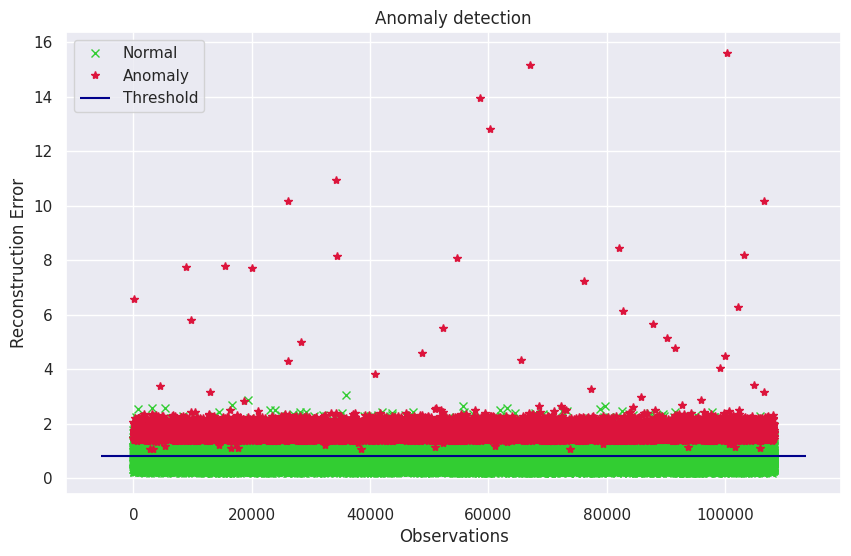

In [ ]:
## Taken plotting code refrence from following book:
## Beginning Anomaly Detection Using Python-Based Deep Learning:
## With Keras and PyTorch by by Sridhar Alla (Author), Suman Kalyan Adari(Author)


## Calculates the reconstruction error and detect anomaly
## based on threshold
threshold = max_error
yy_pred = vae.predict(X_test)
yyDist = np.linalg.norm(X_test - yy_pred, axis =-1)
zz = zip(yyDist >= threshold, yyDist)
yLabel = []
testReconsError = []
for idx, (anomaly, yyDist) in enumerate(zz):
  if anomaly:
    yLabel.append(1)
  else:
    yLabel.append(0)
  testReconsError.append(yyDist)
## Printing Stats
Stats(yLabel, y_test)
## Plotting the results
plot_anomaly(y_test, testReconsError, max_error)

## Confusion matrix

Confusion Matrix:


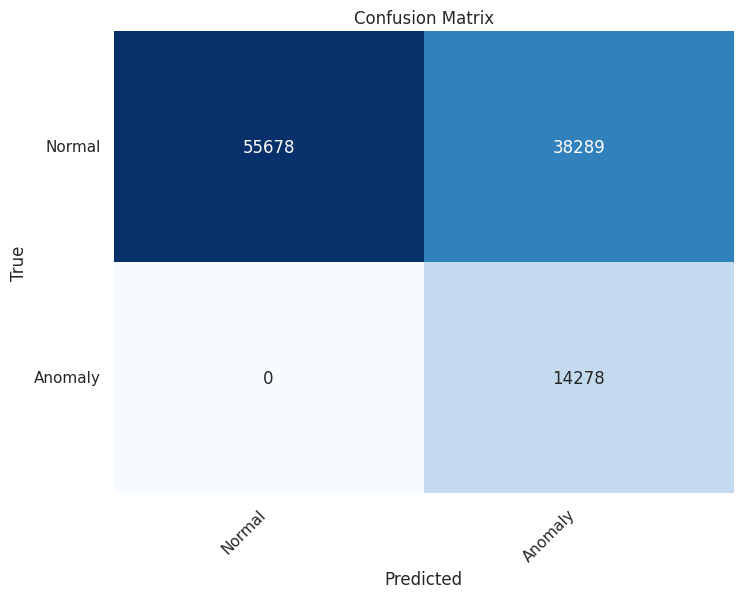

In [ ]:
## Plotting the confusion matrix
cm = confusion_matrix(y_test, yLabel)
print("Confusion Matrix:")
plot_confusion_matrix(cm, np.array(["Normal", "Anomaly"]))

# Explainability of Autoencoder predictions

In [ ]:
!pip install lime shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 44.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=00a273082dc1d1041ac1c459d9ba1e50825d76f6c5cb1075749746dd2178379f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


## 5.1 LIME

In [ ]:
## Getting the index of anomaly in the test set
idx = np.where(np.array(yLabel) == 1)[0]
test_point = idx[50]
print("Index to test:", test_point)

Index to test: 317


In [ ]:
## Code take from lime github page(https://github.com/thomasp85/lime)
## Imporing lime library
import lime
from lime import lime_tabular

instance = lime_tabular.LimeTabularExplainer(
    training_data = np.array(X_train),
    feature_names = feaNames,
    mode = 'regression'
)

X_test_Dummy = np.array(X_test)
exp = instance.explain_instance(data_row = X_test_Dummy[test_point, :],
predict_fn = autoEncoder.predict)

exp.show_in_notebook(show_table=True)

157/157 [==============================] - 0s 2ms/step


In [ ]:
## Explaination for normal instance
exp = instance.explain_instance(data_row = X_test_Dummy[0, :],
predict_fn = autoEncoder.predict)

exp.show_in_notebook(show_table=True)

157/157 [==============================] - 1s 4ms/step


## 5.2 SHAP

In [ ]:
## Dropping the features that we didn't want on training sets
feaNames = feaNames.drop('Label')
feaNames = feaNames.drop('attack_cat')

In [ ]:
## Converting back to DataFrame
X_train = pd.DataFrame(X_train, columns = feaNames)
X_val = pd.DataFrame(X_val, columns = feaNames)
X_test = pd.DataFrame(X_test, columns = feaNames)

  0%|          | 0/200 [00:00<?, ?it/s]

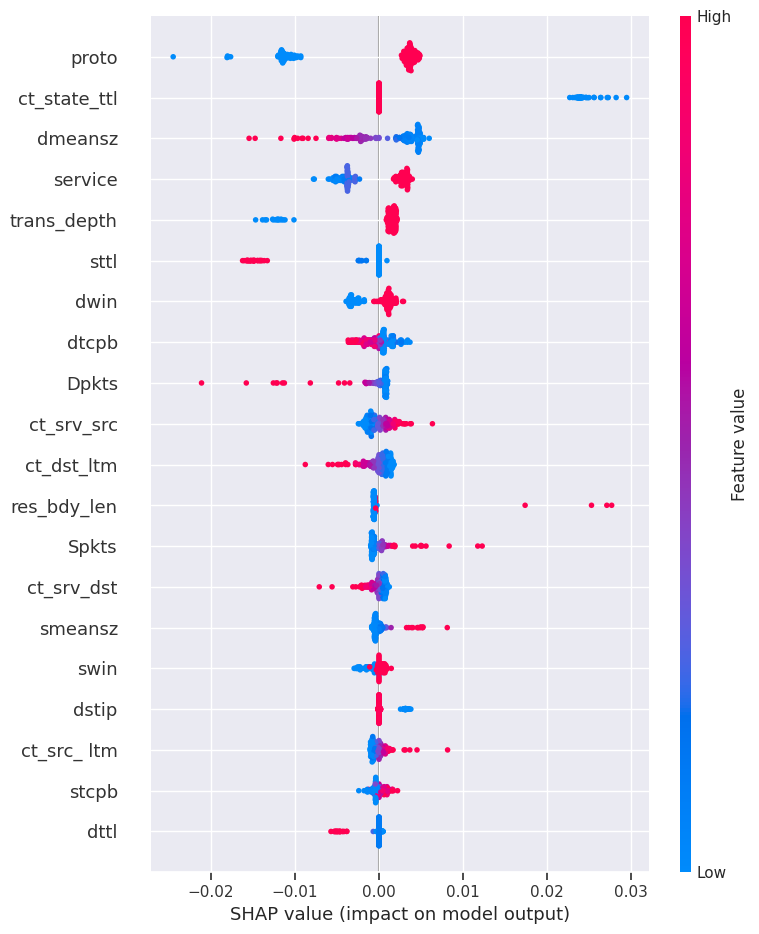

In [ ]:
## Code taken from SHAP github page (https://github.com/slundberg/shap)

import shap
import tensorflow.keras.backend
shap.initjs()


## Redefining our model beacuse shap expects this kind of structure on the class
autoencoder = tf.keras.Sequential([
    layers.Dense(36, activation="LeakyReLU", input_shape=(46,)),
    layers.Dense(8, activation="LeakyReLU"),
    layers.Dense(36, activation="LeakyReLU"),
    layers.Dense(46, activation="sigmoid")
])

## Modifying our data as numpy array because shap uses that and
## Creating qn explainer object for that
explainer = shap.DeepExplainer(autoencoder, X_train.iloc[150:250,:])

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test.iloc[300:500,:])


## Getting the summary plot
shap.summary_plot(shap_values[0], X_test.iloc[300:500,:])

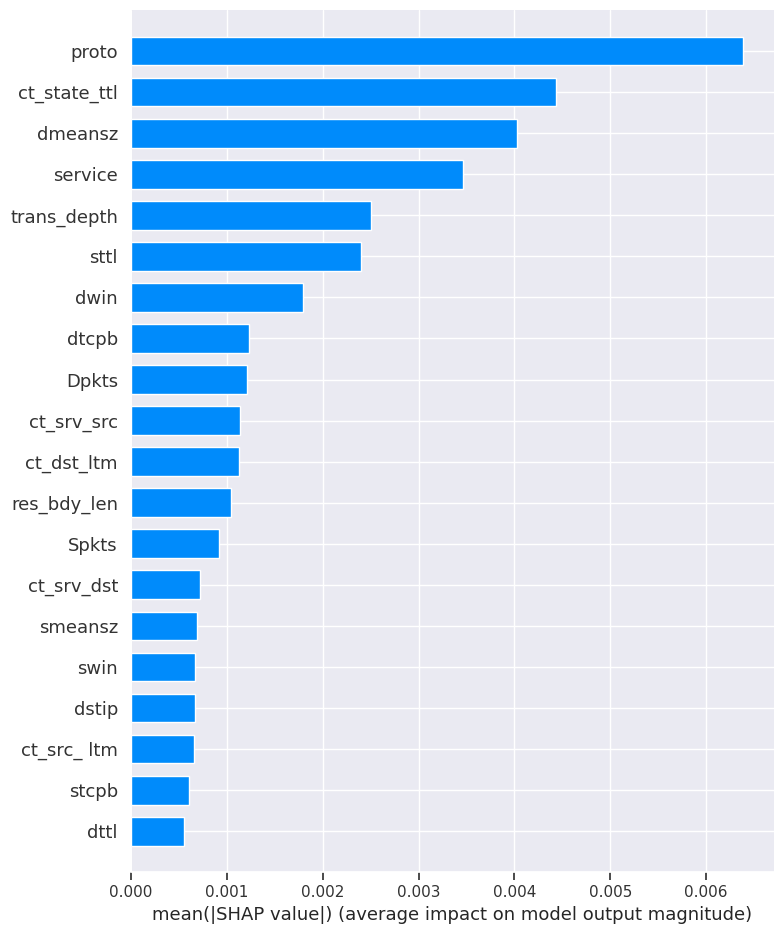

In [ ]:
shap.initjs()
## Summary plot
shap.summary_plot(shap_values[0], X_test.iloc[300:500,:], plot_type='bar')

In [ ]:
shap.initjs()
## Force plot
shap.plots.force(explainer.expected_value[0], shap_values[0])

# One Class SVM

>Training one-class SVM on the subset of the dataset

In [ ]:
## Importing the necessary libraries for SVM
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn import svm
## Used this as refrence
## https://towardsdatascience.com/support-vector-machine-svm-for-anomaly
## -detection-73a8d676c331
## Creating a model but due to compuation power trained on half of the data
model = OneClassSVM(kernel = 'rbf', gamma = 0.5,
                    nu = 0.02).fit(X_train.iloc[:200000, :])
## Getting the predictions
y_pred = model.predict(X_test)

## Getting the outlier indicies
outlierIndicies = np.where(y_pred == -1)

yy_pred = np.zeros(X_test.shape[0])

# Marking the outliers as 1 in y_pred
yy_pred[outlierIndicies] = 1

## Printing the stats for predictions
Stats(yy_pred, y_test)

Accuracy = 0.9615132338676151
F1-score = 0.851859753929308
Precision = 0.8652123663681017
Recall = 0.8389130130270346
AUC-ROC = 0.9095274888796671


# Isolation Forest

> trained on the normal data.

In [ ]:
## Used chatgpt as refrence
## Importing the Isolation forest
from sklearn.ensemble import IsolationForest

# Create an instance of the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)

# Fit the model to your data
clf.fit(X_train)

# Predict the anomalies (outliers)
predicted_labels = clf.predict(X_test)
# Map the predicted labels to 0 for normal and 1 for anomaly
yy_pred = np.where(predicted_labels == 1, 0, 1)


# Getting Stats for your model
Stats(yy_pred, y_test)

Accuracy = 0.9687098711256871
F1-score = 0.8892594409024032
Precision = 0.8339363463543263
Recall = 0.9524443199327637
AUC-ROC = 0.9618128460583077


# Unsupervised K-Nearest Neighbours

In [ ]:
## Converting tensor back to numpy arrays for better performance

## Concatenating
data = np.concatenate((X_train, X_val, X_test), axis=0)
y_data = np.concatenate((y_train, y_val, y_test), axis=0)

In [ ]:
## Combining the dataFrame
combData = np.concatenate((data, y_data.reshape(-1, 1)), axis=1)

## Reshuffling the data
np.random.shuffle(combData)


## Storing the Labels
yy = combData[:,-1]


## Removing the lables
data = combData[:, :-1]

Implementing K nearest neighhours with K=7.

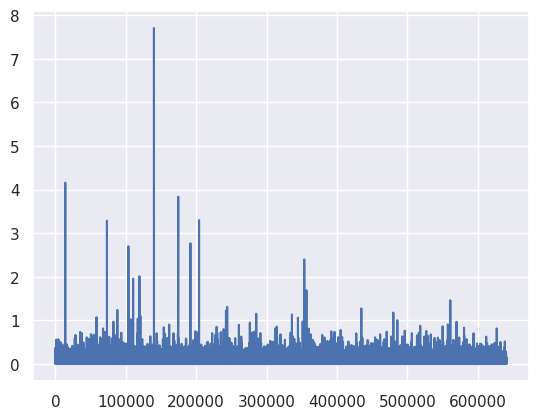

In [ ]:
## Refrence taken from
##https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13

## Importing the necessary libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans

## Initializing the model
nb = NearestNeighbors(n_neighbors = 7)

# fitting the model
nb.fit(data)

## getting the distance and indexex from the model
dist, indices = nb.kneighbors(data)

# plot mean of k-distances of each observation
plt.plot(dist.mean(axis = 1))

In [ ]:
# visually determine the threshold
outlierIndices = np.where(dist.mean(axis = 1) > 0.4)
## getting the indicies for outliers
#outlierIndices

In [ ]:
confidenceInterval_knn = np.percentile(dist.mean(axis = 1), [2.5, 97.5])

## Getting the outliers based on the threshold
outlierThreshold = confidenceInterval_knn[1]
print("Threshold for unsupervised KNN is(based on 95% confidence interval):", outlierThreshold)

Threshold for unsupervised KNN is(based on 95% confidence interval): 0.1353089258002197


In [ ]:
## Getting the indicies of the anomalies
outlierIndices = np.where(dist.mean(axis = 1) > 0.05)

In [ ]:
y_pred = np.zeros(data.shape[0])

# Marking the outliers as 1 in y_pred
y_pred[outlierIndices] = 1

## Printing the stats for predictions
Stats(y_pred, yy)

Accuracy = 0.7177405006196096
F1-score = 0.08873279888743885
Precision = 0.04780571496826526
Recall = 0.6166830088247653
AUC-ROC = 0.6683634056715455


Accuracy above is misleading because there are few anomalies, which are not correctly indentied by this unsupervised model.